## SVR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
base = pd.read_csv('../../data/plano_saude2.csv')
base.head()

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150


In [3]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

In [4]:
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(X, y)
regressor_linear.score(X, y)

0.294299767185203

In [5]:
regressor_poly = SVR(kernel='poly', degree=3)
regressor_poly.fit(X, y)
regressor_poly.score(X, y)

0.6697433307984383

In [6]:
# kernel rbf precisa de escalonamento
scaler_x = StandardScaler()
scaled_x = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
scaled_y = scaler_y.fit_transform(y)

regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(scaled_x, scaled_y)
regressor_rbf.score(scaled_x, scaled_y)

0.7561578176049305

Text(0.5, 1.0, 'Kernel RBF')

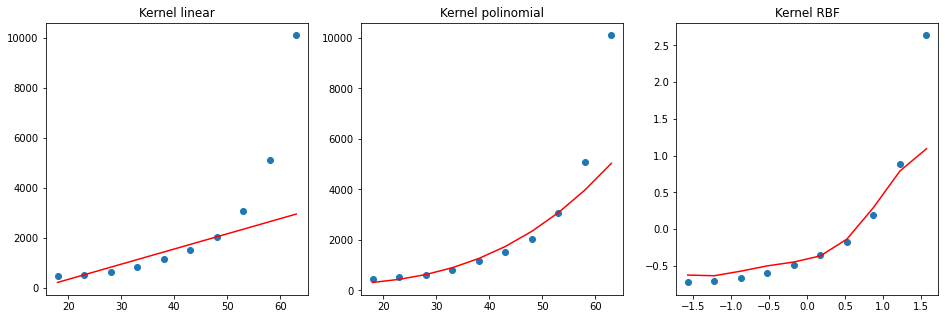

In [8]:
figure(figsize=(16, 5))

plt.subplot(131)
plt.scatter(X, y)
plt.plot(X, regressor_linear.predict(X), color='red')
plt.title('Kernel linear')

plt.subplot(132)
plt.scatter(X, y)
plt.plot(X, regressor_poly.predict(X), color='red')
plt.title('Kernel polinomial')

plt.subplot(133)
plt.scatter(scaled_x, scaled_y)
plt.plot(scaled_x, regressor_rbf.predict(scaled_x), color='red')
plt.title('Kernel RBF')